In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [2]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [3]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [4]:
ctf = 'CRIM'
imputer = SimpleImputer(strategy='mean')
df[[ctf]] = imputer.fit_transform(df[[ctf]])

In [5]:
ctf = 'ZN'

imputer = SimpleImputer(strategy='mean')
df[[ctf]] = imputer.fit_transform(df[[ctf]])

In [6]:
ctf = 'INDUS'

imputer = SimpleImputer(strategy='mean')
df[[ctf]] = imputer.fit_transform(df[[ctf]])

In [7]:
ctf = 'CHAS'

imputer = SimpleImputer(strategy='mean')
df[[ctf]] = imputer.fit_transform(df[[ctf]])

In [8]:
ctf = ['AGE','LSTAT']
for column in ctf:
    imputer = SimpleImputer(strategy='mean')
    df[[column]] = imputer.fit_transform(df[[column]])

In [9]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
x=df.drop('MEDV',axis=1)
y=df['MEDV']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=LinearRegression()

In [11]:
clf.fit(x_train,y_train)

LinearRegression()

In [12]:
regr = LinearRegression()
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test))

0.7464019588409594


In [13]:
predictions=clf.predict(x_test)

In [14]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 18.96876687791394


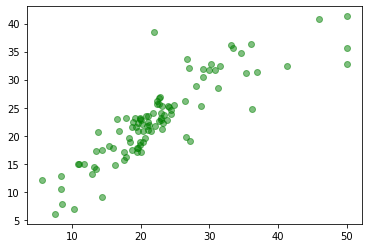

In [15]:
plt.scatter(y_test, predictions, color='green', label='Predicted', alpha=0.5)
plt.show()

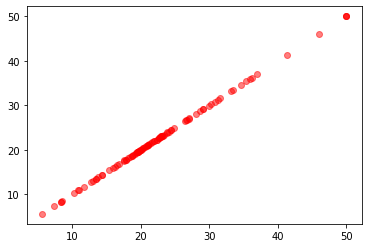

In [16]:
plt.scatter(y_test, y_test, color='red', label='Predicted', alpha=0.5)

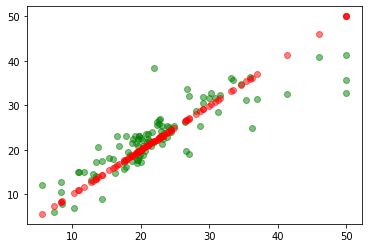

In [17]:
plt.scatter(y_test, predictions, color='green', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, color='red', label='Predicted', alpha=0.5)